# Library Import

In [1]:
#Import the library
from feature_selector import FeatureSelectorRL
import pandas as pd

# Processing of the data

In [2]:
#Data processing (14 features, 690 rows)

datContent = [i.strip().split() for i in open("../data/australian_data.dat").readlines()]
import csv
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', header=None)
X = australian_data.drop(14, axis=1)
y = australian_data[14]

# Feature selection step

In [3]:
#Init of the selector object
fsrl_obj = FeatureSelectorRL(14, eps=.2, nb_iter=100)

In [4]:
# We fit the model and get the results
results = fsrl_obj.fit_predict(X, y)
results

---------- Default Parameters init ----------
---------- Process init ----------
---------- Data Processing ----------
---------- The process has been successfully init ----------
---------- Training ----------


100%|██████████| 100/100 [00:48<00:00,  2.05it/s]

---------- Results ----------


([(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  array([ 64.,  94.,  56.,  62., 100.,  70.,  90., 100.,  92.,  94.,  82.,
          83.,  54.,  98.]),
  (-0.0035104285136619813,
   0.0010887194961638933,
   -0.009898182410348825,
   -0.005485877444542648,
   0.014681443554090965,
   -0.00355373326620306,
   0.0011277346926519308,
   0.12141856934282709,
   0.0011283046069199085,
   0.014720598690042873,
   -0.0008430966489034967,
   0.0004633969363093511,
   -0.008112680946048563,
   0.006594797120684101),
  array([ 2, 12,  3,  5,  0, 10, 11,  1,  6,  8, 13,  4,  9,  7])],
 1139)

# Analysis of the results

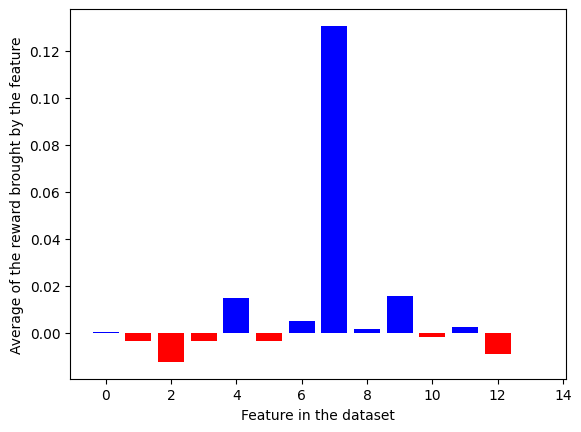

In [11]:
# Plot of the importance of each feature
fsrl_obj.get_feature_strengh(results)

---------- Data Processing ----------
---------- Score ----------
Set of variables : Benchmark : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] and RL : [12  5  3  1 10 13  0  8 11  6  4  9  7]
Benchmark accuracy : 0.868421052631579, RL accuracy : 0.868421052631579 with 13 variables [1]
Set of variables : Benchmark : [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13] and RL : [ 5  3  1 10 13  0  8 11  6  4  9  7]
Benchmark accuracy : 0.8640350877192983, RL accuracy : 0.8771929824561403 with 12 variables [1, 1]
Set of variables : Benchmark : [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13] and RL : [ 3  1 10 13  0  8 11  6  4  9  7]
Benchmark accuracy : 0.8596491228070176, RL accuracy : 0.881578947368421 with 11 variables [1, 1, 1]
Set of variables : Benchmark : [1, 2, 4, 5, 6, 7, 8, 9, 12, 13] and RL : [ 1 10 13  0  8 11  6  4  9  7]
Benchmark accuracy : 0.8596491228070176, RL accuracy : 0.8728070175438597 with 10 variables [1, 1, 1, 1]
Set of variables : Benchmark : [1, 2, 4, 6, 7, 8, 9, 12, 13] and RL : [10 1

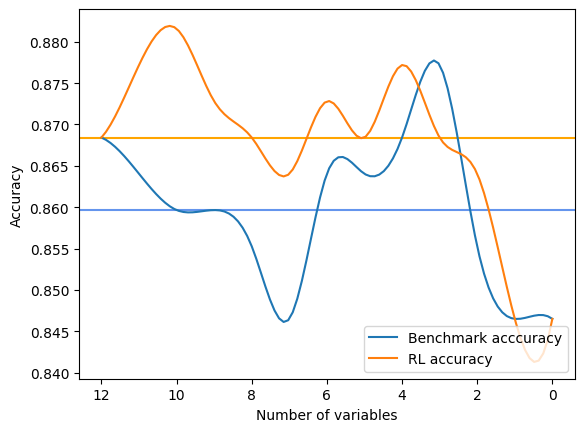

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [12]:
# Plot the comparison with the benchmark
fsrl_obj.compare_with_benchmark(X, y, results)

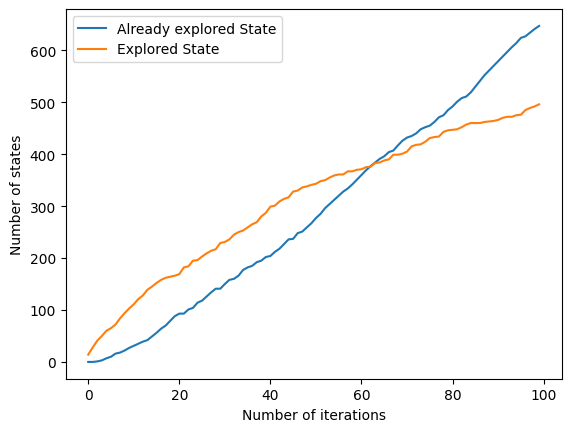

In [13]:
# Plot the ration exploration greedy step
fsrl_obj.get_plot_ratio_exploration()

In [14]:
# Plot the best states (for accuracy and v_value maximisation)
fsrl_obj.get_best_state()

([State(number=[10, 19], description=[7, 8, 6, 9, 4, 0, 13, 5, 10, 3], v_value=-0.03495611842105263, reward=0.8947368421052632, nb_visited=3),
  0.8947368421052632],
 [State(number=[1, 7], description=[3], v_value=0.3329595442105262, reward=0.5175438596491229, nb_visited=2),
  0.3329595442105262])

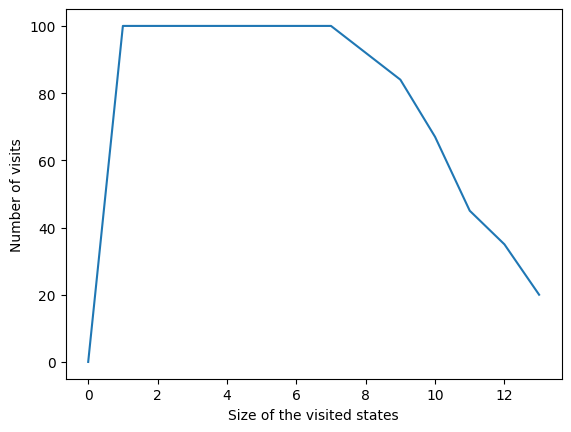

In [15]:
# Plot the detph of the browsing by the algorithm
fsrl_obj.get_depth_of_visited_states()